# Bitcoin Prices Dataset - Bitcoin Historical Price Records


### Data Exploration

In [1]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
#Importing the dataset
df = pd.read_csv("../input/bitcoin-prices-dataset/Bitcoin.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2683 non-null   object 
 1   Open       2683 non-null   float64
 2   High       2683 non-null   float64
 3   Low        2683 non-null   float64
 4   Close      2683 non-null   float64
 5   Adj Close  2683 non-null   float64
 6   Volume     2683 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 146.9+ KB


In [5]:
#checking null value 
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
#Conversion data type column - Date from object to Datetime

df["Date"]=pd.to_datetime(df["Date"])

In [7]:
#Checking the stats of all the columns
df.describe().round(2)

,Open,High,Low,Close,Adj Close,Volume
count,2683.00,2683.00,2683.00,2683.00,2683.00,2.683000e+03
mean,10989.90,11286.63,10662.96,11003.58,11003.58,1.459304e+10
std,15902.62,16331.95,15408.07,15908.16,15908.16,2.008458e+10
min,176.90,211.73,171.51,178.10,178.10,5.914570e+06
25%,601.78,606.71,596.05,602.73,602.73,7.839140e+07
50%,6235.03,6371.55,6093.67,6238.05,6238.05,4.999240e+09
75%,10316.64,10495.61,10067.54,10317.94,10317.94,2.445092e+10
max,67549.73,68789.62,66382.06,67566.83,67566.83,3.509679e+11


In [8]:
#add columns Day 
df["Day"]=df['Date'].dt.day_name()

In [9]:
aa=df.groupby("Day")["Open","High","Low","Close"].mean()
aa

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close
Day,,,,
Friday,10930.143062,11251.861715,10577.704518,10966.162184
Monday,11005.049273,11333.880029,10646.386624,11022.631542
Saturday,10966.876295,11224.605680,10721.683085,11000.825794
Sunday,10999.467468,11240.568844,10697.103773,11005.381742
Thursday,11024.739384,11328.014281,10682.489748,11004.798228
Tuesday,11023.720839,11300.827519,10672.627896,11002.253700
Wednesday,10979.242655,11326.406224,10642.707221,11022.965573


<AxesSubplot:xlabel='Day'>

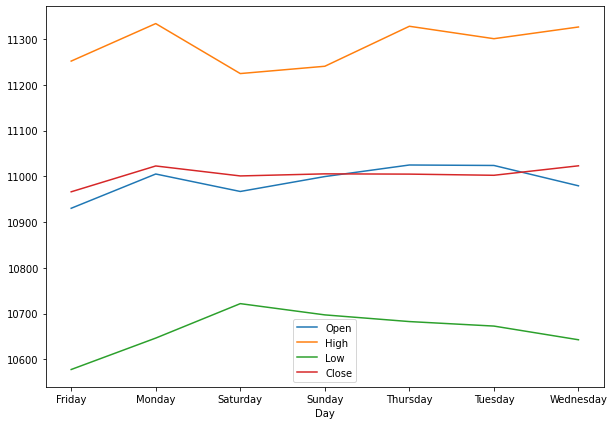

In [10]:
#visualization group by
aa.plot(figsize=(10,7))

#### we see the less value on Friday and Saturday because holiday

## visualutions the data set

In [11]:
px.line(df, x="Date",y="Open",color="Day")

In [12]:
px.line(df, x="Date",y="High",color="Day")

In [13]:
px.scatter_matrix(df,color="Day")

In [14]:
df['Year']=df['Date'].dt.year

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2683 non-null   datetime64[ns]
 1   Open       2683 non-null   float64       
 2   High       2683 non-null   float64       
 3   Low        2683 non-null   float64       
 4   Close      2683 non-null   float64       
 5   Adj Close  2683 non-null   float64       
 6   Volume     2683 non-null   int64         
 7   Day        2683 non-null   object        
 8   Year       2683 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 188.8+ KB


## Machine learning

In [16]:
# X_train , X_test , Y_train , Y_test 
X=df.drop(columns=["Volume","Date","Day"],axis=1)
y=df["Volume"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
print("X Train : ", X_train.shape)
print("X Test : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test : ", y_test.shape)

X Train :  (1797, 6)
X Test :  (886, 6)
Y Train :  (1797,)
Y Test :  (886,)


In [18]:
#Building Model

model=LinearRegression()

In [19]:
#fit model
model.fit(X_train,y_train)

LinearRegression()

In [20]:
model.score(X,y)

0.7188442624405004

In [21]:
y_pre = model.predict(X_test)

In [22]:
y_pre

array([ 4.99921544e+10,  8.60611268e+09,  1.13593513e+10,  8.13838450e+08,
       -4.02944578e+09, -4.02085075e+09, -4.04275599e+09, -4.05555738e+09,
       -4.01637693e+09,  9.33028274e+08,  1.18999257e+10,  6.31232460e+10,
        8.44740527e+08,  7.95248855e+08,  2.14016327e+10,  2.74561599e+10,
       -4.02525168e+09,  6.97938482e+09,  1.28736112e+10,  1.86514337e+10,
        2.79972714e+10,  3.74846340e+10,  2.06820489e+10,  6.94761165e+09,
        2.49016562e+10,  1.76132987e+10,  5.54754637e+10,  1.13665494e+10,
       -4.02105275e+09,  4.60476296e+10,  1.25077628e+09,  1.46991677e+10,
        2.79927724e+10,  9.02889515e+08, -3.94385465e+09,  1.57618421e+10,
        1.36424861e+10,  6.71862964e+09,  1.57737651e+10, -4.03182753e+09,
        1.65660058e+10, -4.04838585e+09, -4.06077199e+09,  1.76319024e+10,
        7.86030358e+08,  6.54181822e+09,  1.59351817e+10,  1.77954863e+10,
        2.73322766e+10,  3.14851083e+10,  2.37879303e+10,  2.20658572e+10,
       -4.06320418e+09,  

In [23]:
y_test

2442    56211915803
1134     1966989952
1510     4174800000
506        43825000
211        24805400
           ...     
381        16482700
2484    26501259870
731        37140300
1078     1937849984
2528    37204312299
Name: Volume, Length: 886, dtype: int64

In [24]:
from sklearn.metrics import mean_absolute_error

In [25]:
mean_absolute_error(y_test,y_pre)

6626344788.058206

Not Working this model